In [54]:
import autogluon


In [55]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [56]:
from sklearn.model_selection import train_test_split
dataset = TabularDataset('adult.csv')

df_train, df_test = train_test_split(dataset, test_size=0.25)

Loaded data from: adult.csv | Columns = 15 / 15 | Rows = 32561 -> 32561


In [57]:
train_data = df_train
train_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
10581,19,Private,144161,HS-grad,9,Never-married,Transport-moving,Own-child,White,Male,0,0,30,United-States,<=50K
18437,39,Private,151248,Some-college,10,Divorced,Sales,Other-relative,White,Female,0,0,35,United-States,<=50K
7579,61,Private,147845,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,31,United-States,<=50K
19219,43,Private,206878,HS-grad,9,Never-married,Adm-clerical,Unmarried,White,Female,0,0,60,United-States,<=50K
13323,27,Private,207611,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,52,United-States,<=50K


In [58]:
label = 'income'
print(f"Unique classes: {list(train_data[label].unique())}")

Unique classes: ['<=50K', '>50K']


In [59]:
predictor = TabularPredictor(label=label, path="agModels_predict_income_normal").fit(
    train_data,
    time_limit=14400,
    presets='best_quality',
    ag_args_fit={'num_cpus': 16}  #using 16 threads
)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1-NixOS SMP PREEMPT_DYNAMIC Sat Jul 27 09:40:36 UTC 2024
CPU Count:          32
Memory Avail:       56.66 GB / 62.71 GB (90.3%)
Disk Space Avail:   841.40 GB / 1816.45 GB (46.3%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdout validation data is used to dete

In [60]:
test_data = df_test
test_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1236,57,Private,142791,7th-8th,4,Widowed,Sales,Other-relative,White,Female,0,1602,3,United-States,<=50K
17854,59,Self-emp-not-inc,73411,Prof-school,15,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,30,United-States,<=50K
22800,23,Private,322674,Some-college,10,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
26380,17,Private,266134,10th,6,Never-married,Other-service,Own-child,White,Male,0,0,12,United-States,<=50K
9898,34,Private,325658,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K


In [61]:
predictor.evaluate(test_data)

{'accuracy': 0.878270482741678,
 'balanced_accuracy': 0.8063311021224558,
 'mcc': 0.652007840689332,
 'roc_auc': 0.9334387877527647,
 'f1': 0.7254087004710446,
 'precision': 0.7942961165048543,
 'recall': 0.6675165731769506}

In [62]:
predictor.leaderboard(test_data)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,XGBoost_r194_BAG_L1,0.881219,0.872891,accuracy,0.070812,0.039540,4.100129,0.070812,0.039540,4.100129,1,True,28
1,CatBoost_BAG_L1,0.878762,0.872154,accuracy,0.030136,0.103799,76.742714,0.030136,0.103799,76.742714,1,True,5
2,XGBoost_r89_BAG_L1,0.878270,0.874079,accuracy,0.142430,0.082494,5.789797,0.142430,0.082494,5.789797,1,True,23
3,WeightedEnsemble_L2,0.878270,0.874079,accuracy,0.143171,0.083652,6.407956,0.000741,0.001157,0.618159,2,True,40
4,CatBoost_r167_BAG_L1,0.878025,0.873096,accuracy,0.029427,0.035911,19.456268,0.029427,0.035911,19.456268,1,True,37
5,CatBoost_r50_BAG_L1,0.877902,0.871826,accuracy,0.035087,0.042699,12.492317,0.035087,0.042699,12.492317,1,True,26
6,CatBoost_r70_BAG_L1,0.877779,0.872727,accuracy,0.047557,0.051177,18.716614,0.047557,0.051177,18.716614,1,True,34
7,XGBoost_BAG_L1,0.877779,0.872277,accuracy,0.121128,0.184373,59.774266,0.121128,0.184373,59.774266,1,True,9
8,XGBoost_r33_BAG_L1,0.877779,0.871007,accuracy,0.281244,0.130520,9.119314,0.281244,0.130520,9.119314,1,True,16
9,CatBoost_r69_BAG_L1,0.877533,0.871949,accuracy,0.025832,0.033153,15.256297,0.025832,0.033153,15.256297,1,True,30


In [63]:
import pandas as pd

leaderboard_df_normal = predictor.leaderboard(test_data, extra_info=True)

print(leaderboard_df_normal)

                          model  score_test  score_val eval_metric  \
0           XGBoost_r194_BAG_L1    0.881219   0.872891    accuracy   
1               CatBoost_BAG_L1    0.878762   0.872154    accuracy   
2            XGBoost_r89_BAG_L1    0.878270   0.874079    accuracy   
3           WeightedEnsemble_L2    0.878270   0.874079    accuracy   
4          CatBoost_r167_BAG_L1    0.878025   0.873096    accuracy   
5           CatBoost_r50_BAG_L1    0.877902   0.871826    accuracy   
6           CatBoost_r70_BAG_L1    0.877779   0.872727    accuracy   
7                XGBoost_BAG_L1    0.877779   0.872277    accuracy   
8            XGBoost_r33_BAG_L1    0.877779   0.871007    accuracy   
9           CatBoost_r69_BAG_L1    0.877533   0.871949    accuracy   
10         CatBoost_r137_BAG_L1    0.877411   0.871458    accuracy   
11         CatBoost_r177_BAG_L1    0.876182   0.872359    accuracy   
12           CatBoost_r9_BAG_L1    0.876182   0.872645    accuracy   
13          CatBoost

In [64]:
from IPython.display import FileLink
leaderboard_df_normal.to_csv('autogluon_leaderboard_classification_normal.csv', index=False)

In [65]:
FileLink('autogluon_leaderboard_classification_normal.csv')

/opt/nb/autogluon_leaderboard_classification_normal.csv

In [66]:
#predict score
evaluation_results = predictor.evaluate(test_data)

#to df
evaluation_df_normal = pd.DataFrame([evaluation_results])

print(evaluation_df_normal)

#to CSV
evaluation_df_normal.to_csv('autogluon_classification_predictorScore_normal.csv', index=False)

FileLink('autogluon_classification_predictorScore_normal.csv')

   accuracy  balanced_accuracy       mcc   roc_auc        f1  precision  \
0   0.87827           0.806331  0.652008  0.933439  0.725409   0.794296   

     recall  
0  0.667517  


/opt/nb/autogluon_classification_predictorScore_normal.csv

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

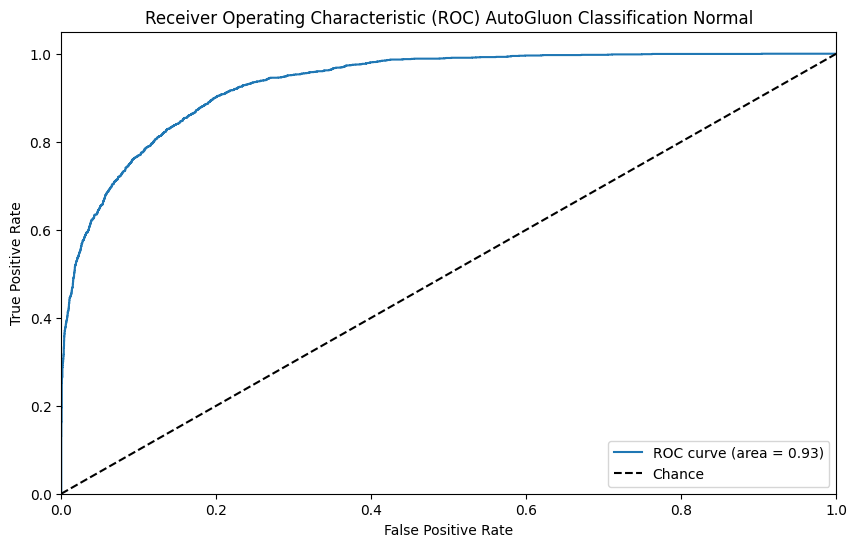

In [68]:
y_true = test_data['income']  
y_scores = predictor.predict_proba(test_data)['>50K']   #positive class

#true class as a number 

y_true = test_data['income'].apply(lambda x: 1 if x == '>50K' else 0)  # convert labels in binary form
y_scores = predictor.predict_proba(test_data)['>50K']

# ROC
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance') #diagonal line for 'chance'

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) AutoGluon Classification Normal')
plt.legend(loc="lower right")


plt.savefig('AutoGluon_classification_normal_roc_curve.png', dpi=300)
plt.show()

In [69]:
print(predictor.predict_proba(test_data).columns)

Index(['<=50K', '>50K'], dtype='object')


In [70]:
print(predictor.class_labels)

['<=50K', '>50K']
